## Image similarity clustering

In [124]:
import os, sys
import datetime
from os import listdir
from os.path import isfile, join
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image, display

In [90]:
PATH='../input/merged_data/'

In [91]:
#for image-similarity-clustering we need a tab delimited csv of file names
cluster_names = [f for f in listdir('plots/clustering/') if isfile(join('plots/clustering/', f))]

In [92]:
d={}
for n in cluster_names:
    id = n.split('.')[0]
    d[id] = n

In [93]:
image_df = pd.DataFrame(list(d.items()), columns=['id', 'image'])

In [94]:
image_df.head()

,id,image
0,MAC004524,MAC004524.png
1,MAC005552,MAC005552.png
2,MAC003323,MAC003323.png
3,MAC002043,MAC002043.png
4,MAC003579,MAC003579.png


In [95]:
image_df.to_csv('{0}clustering_image_df.csv'.format(PATH), sep='\t')

Now run image-similarity-clustering scripts, then run cells below

In [101]:
tsne_data = pd.read_csv('{0}clustering_image_df_features_tsne.tsv'.format(PATH), sep='\t')

In [102]:
tsne_data.head()

,id,x,y
0,MAC004524,29.137983,11.864633
1,MAC005552,-14.520267,-12.692546
2,MAC003323,-30.180584,6.468663
3,MAC002043,9.439738,21.438162
4,MAC003579,-4.292289,-6.983723


In [103]:
x = tsne_data['x']

In [104]:
y = tsne_data['y']

In [105]:
c = tsne_data['id']

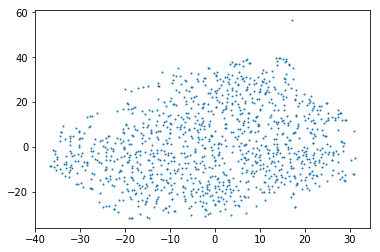

In [106]:
plt.scatter(x, y, s=1)

TODO, test different parameters for TSNE algo to see effect on groupings

Lets look at the 'cluster' in the centre 

In [134]:
sector_1 = tsne_data.loc[(tsne_data['x'] > -2) & ( tsne_data['x'] < 2) & ( tsne_data['y'] > 0) & ( tsne_data['y'] < 5)]

In [135]:
#show the similarly clusterd households

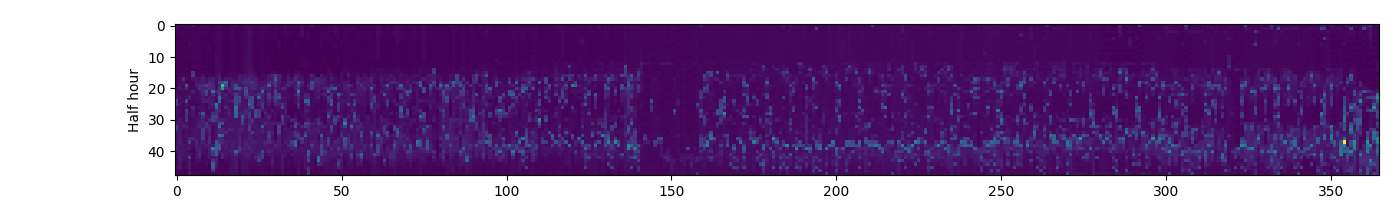

MAC005002


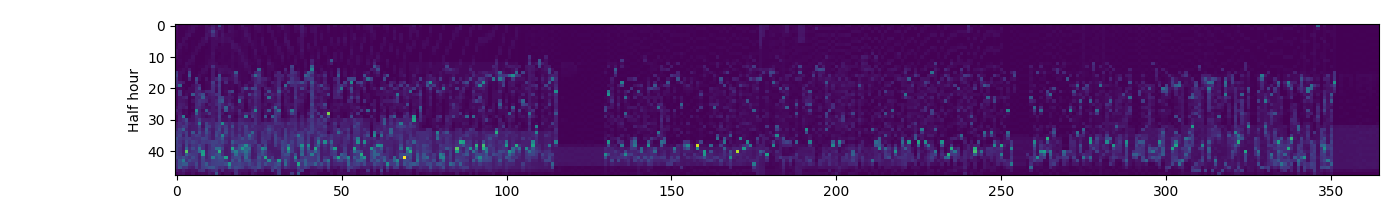

MAC000910


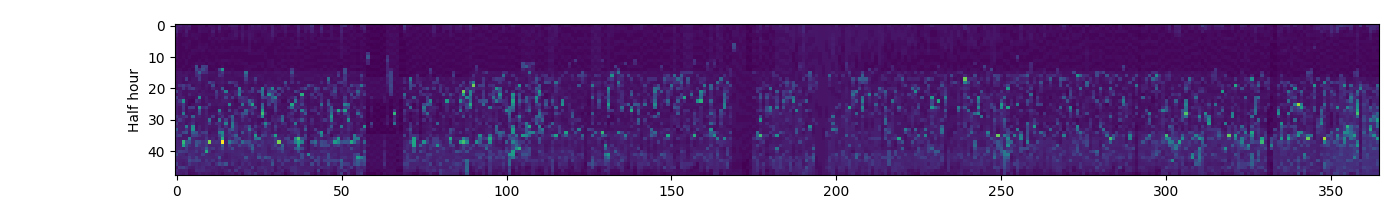

MAC004974


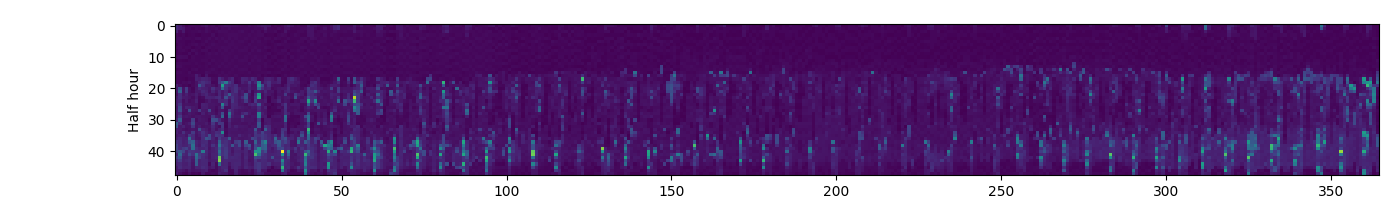

MAC004567


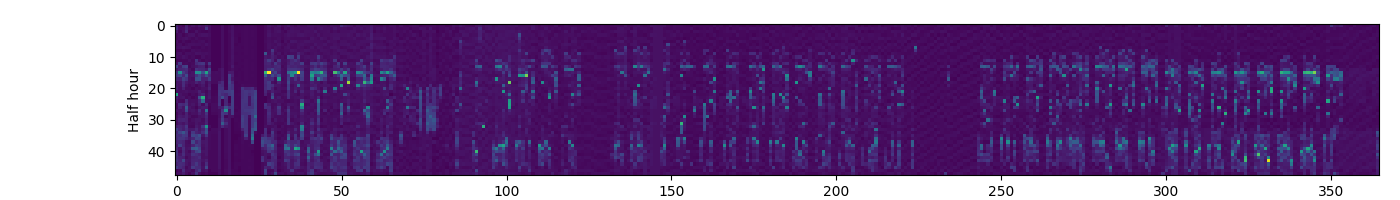

MAC004373


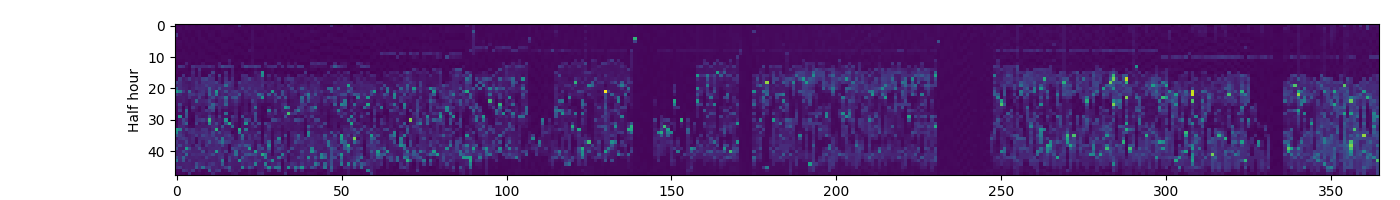

MAC001210


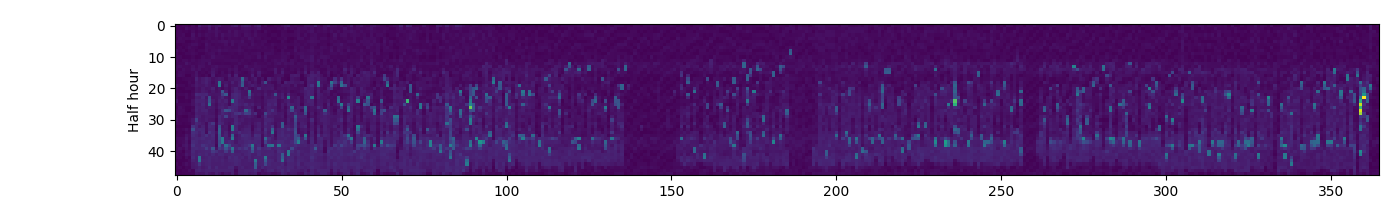

MAC003397


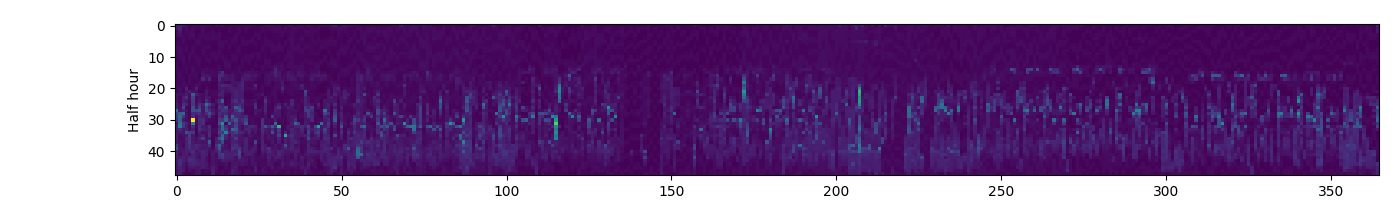

MAC005463


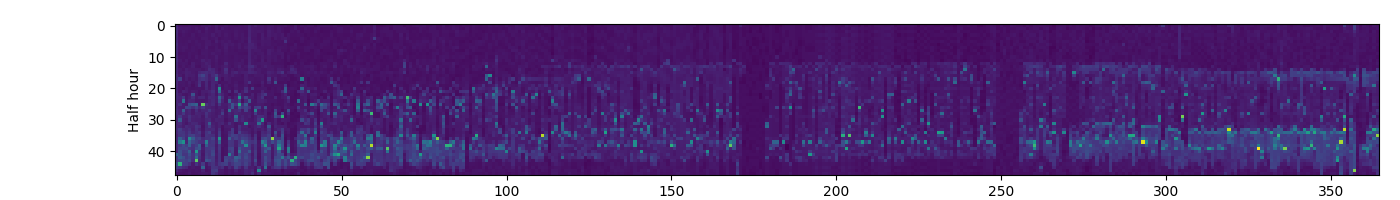

MAC003773


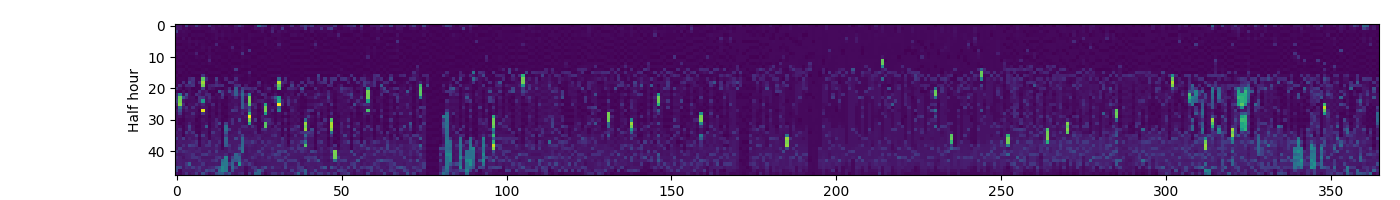

MAC005157


In [136]:
from IPython.display import Image, display
for id in sector_1['id']:
    display(Image(filename='plots/clustering/{0}.png'.format(id)))
    print(id)

Now another area

In [114]:
sector_2 = tsne_data.loc[(tsne_data['x'] < -35) & ( tsne_data['y'] < 0)]

In [115]:
#show the similarly clusterd households

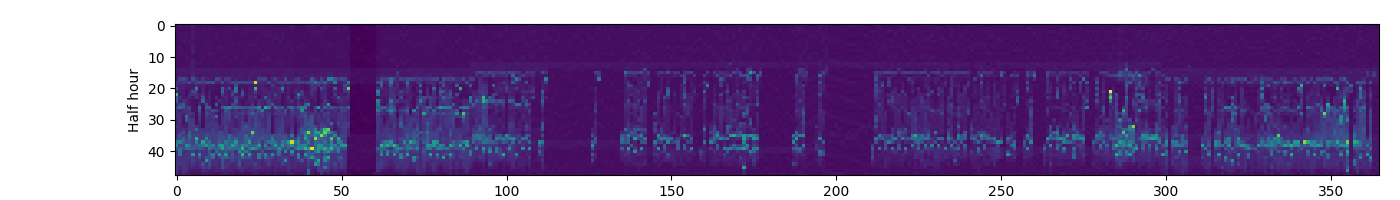

MAC004955


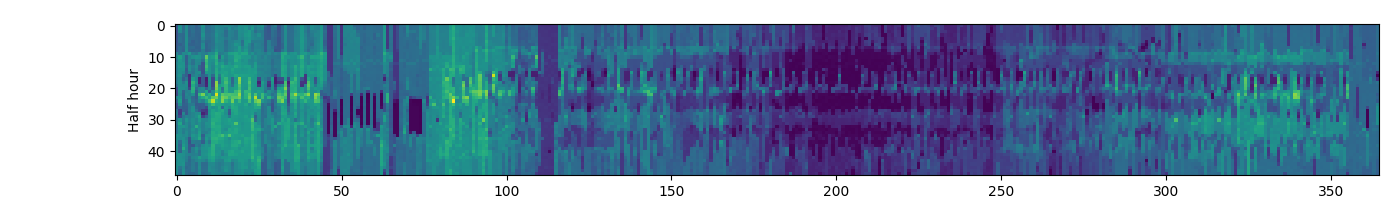

MAC003667


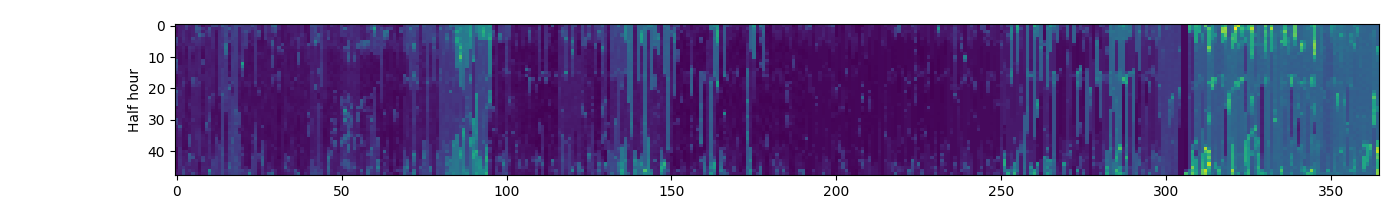

MAC001805


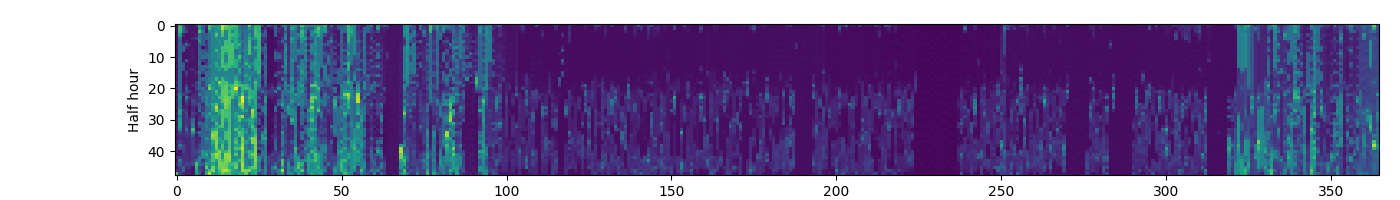

MAC001571


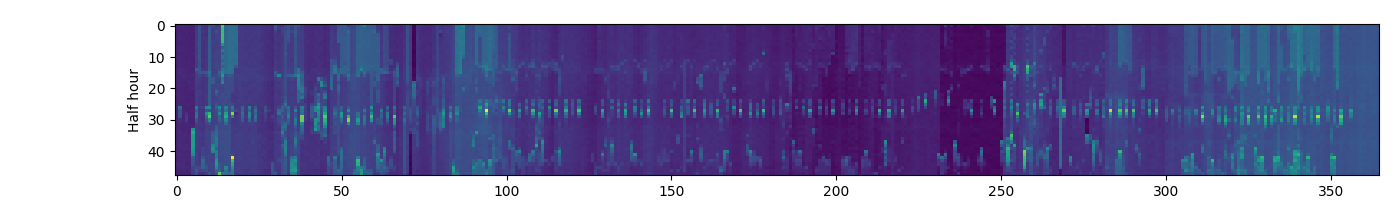

MAC003603


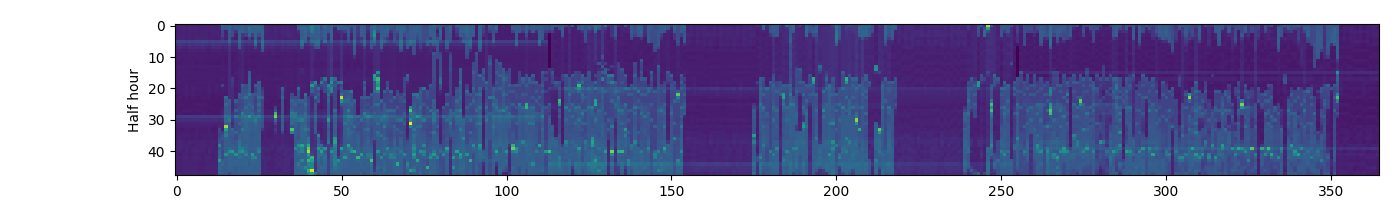

MAC000872


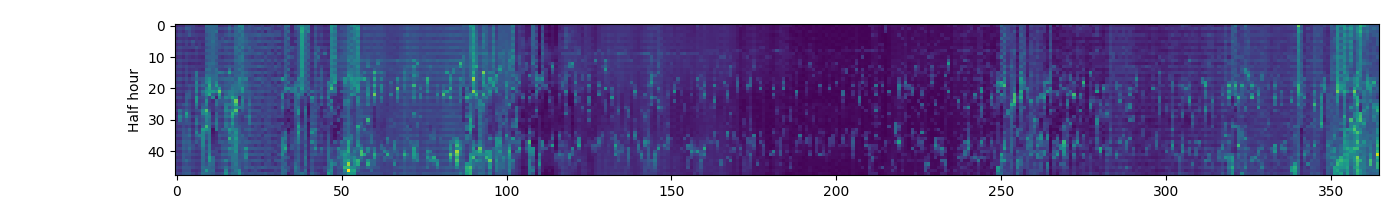

MAC001698


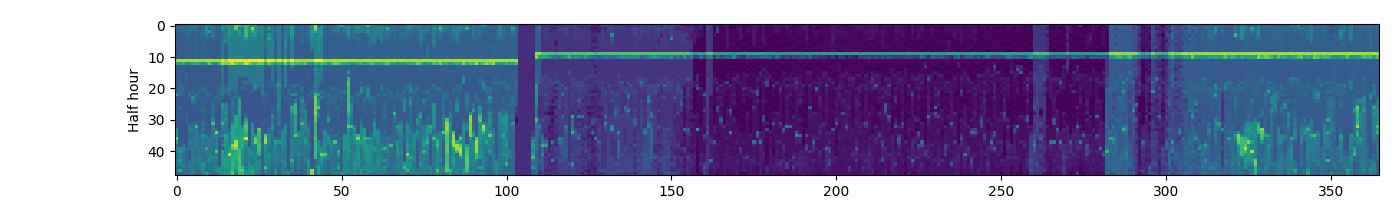

MAC002913


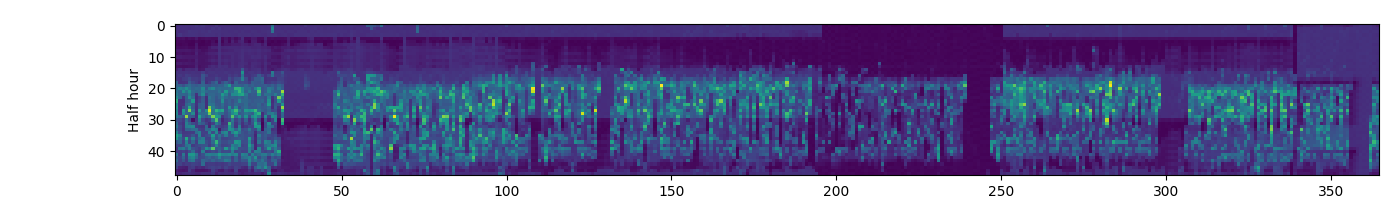

MAC000443


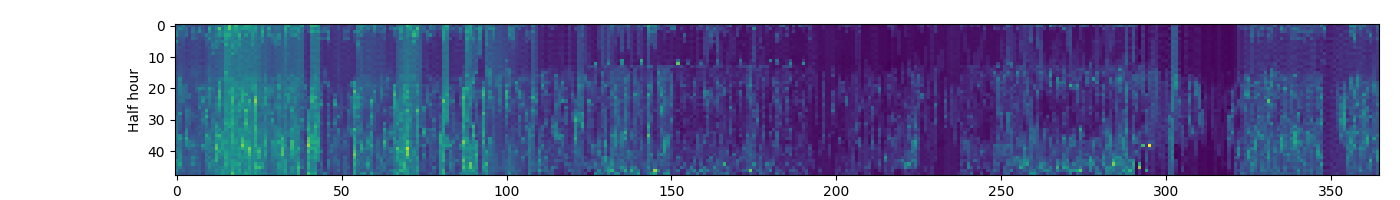

MAC001739


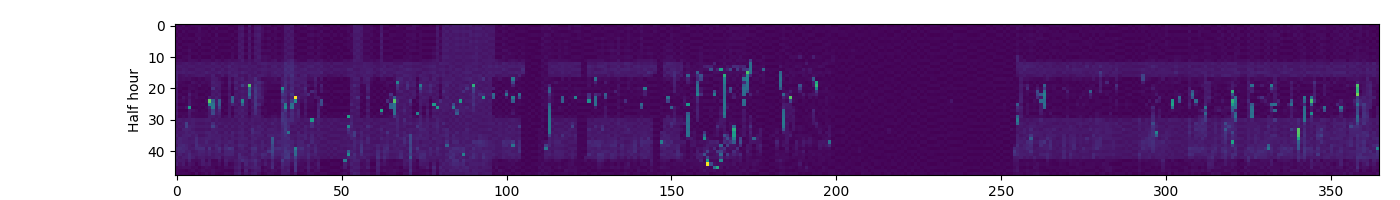

MAC005455


In [116]:

for id in sector_2['id']:
    display(Image(filename='plots/clustering/{0}.png'.format(id)))
    print(id)

Lets see of Acorns appear grouped in the tsne plot

In [117]:
ih = pd.read_csv('{0}informations_households.csv'.format(PATH))

In [118]:
ih.head()

,LCLid,stdorToU,Acorn,Acorn_grouped,file
0,MAC005492,ToU,ACORN-,ACORN-,block_0
1,MAC001074,ToU,ACORN-,ACORN-,block_0
2,MAC000002,Std,ACORN-A,Affluent,block_0
3,MAC003613,Std,ACORN-A,Affluent,block_0
4,MAC003597,Std,ACORN-A,Affluent,block_0


In [119]:
ih.rename(columns={'LCLid': 'id'}, inplace=True)

In [120]:
ih.drop(columns=['stdorToU','file'],inplace=True)

In [121]:
cmap = plt.get_cmap('viridis')

In [130]:
acorns = list(set(ih['Acorn']))

In [131]:
colors = list(cmap(np.linspace(0, 1, len(acorns))))

In [126]:
df = pd.merge(tsne_data, ih, on='id')

In [127]:
df.head(n=2)

,id,x,y,Acorn,Acorn_grouped
0,MAC004524,29.137983,11.864633,ACORN-M,Adversity
1,MAC005552,-14.520267,-12.692546,ACORN-E,Affluent


In [103]:
x = df['x']

In [104]:
y = df['y']

create a new column of zeros then give it a colour according to Acorn

In [128]:
df['color']=0

In [133]:
for a, c in zip(acorns, colors):
    mask = df.loc[df['Acorn'] == a]
    df.loc[mask, 'color'] = c
    

ACORN-E
[0.267004 0.004874 0.329415 1.      ]


KeyError: "[('i', 'd') ('x',) ('y',) ('A', 'c', 'o', 'r', 'n')\n ('A', 'c', 'o', 'r', 'n', '_', 'g', 'r', 'o', 'u', 'p', 'e', 'd')\n ('c', 'o', 'l', 'o', 'r')] not in index"

In [105]:
c = tsne_data['id']

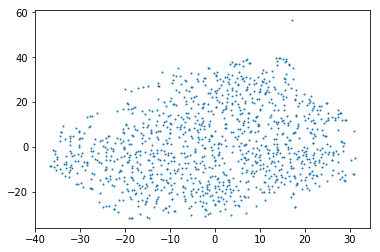

In [106]:
plt.scatter(x, y, s=1)